In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [21]:
df = pd.read_csv('data/stud.csv')

In [22]:
 df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [23]:
df.shape

(1000, 8)

In [24]:
df.info


<bound method DataFrame.info of      gender race_ethnicity parental_level_of_education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test_preparation_course  math_score  reading_score  writing_score  
0                      none    

In [25]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [26]:
df.duplicated().sum()

0

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [28]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [29]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [30]:
# exploring data 

print("categories in 'gender' variable: ", end="")
print(df['gender'].unique())

print("categories in 'race_ethnicity' variable: ", end="")
print(df['race_ethnicity'].unique())

print("categories in 'parental level of education' variable: ", end="")
print(df['parental_level_of_education'].unique())

print("categories in 'lunch' variable: ", end="")
print(df['lunch'].unique())

print("categories in 'test preparation course' variable: ", end="") 
print(df['test_preparation_course'].unique())


categories in 'gender' variable: ['female' 'male']
categories in 'race_ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']
categories in 'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in 'lunch' variable: ['standard' 'free/reduced']
categories in 'test preparation course' variable: ['none' 'completed']


In [31]:
# define numeric and categorical columns

numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorial_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print the numerical and categorical features of the dataset
print('we have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('we have {} categorical features : {}'.format(len(categorial_features), categorial_features))

we have 3 numerical features : ['math_score', 'reading_score', 'writing_score']
we have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [32]:
# ADDING columns for "total score " and "average score"
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average score'] = df['total score'] / 3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [33]:
print(df.columns)


Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total score', 'average score'],
      dtype='object')


In [34]:
df['average'] = df[['math_score', 'reading_score', 'writing_score']].mean(axis=1)


In [35]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print("Number of students who got 100 in reading: {reading_full}")
print("Number of students who got 100 in writing: {writing_full}")  
print("Number of students who got 100 in math:{math_full}")

Number of students who got 100 in reading: {reading_full}
Number of students who got 100 in writing: {writing_full}
Number of students who got 100 in math:{math_full}


In [36]:
reading_full = df[df['reading_score'] == 100].shape[0]
writing_full = df[df['writing_score'] == 100].shape[0]
math_full = df[df['math_score'] == 100].shape[0]

print(f"Number of students who got 100 in reading: {reading_full}")
print(f"Number of students who got 100 in writing: {writing_full}")
print(f"Number of students who got 100 in math: {math_full}")


Number of students who got 100 in reading: 17
Number of students who got 100 in writing: 14
Number of students who got 100 in math: 7


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns


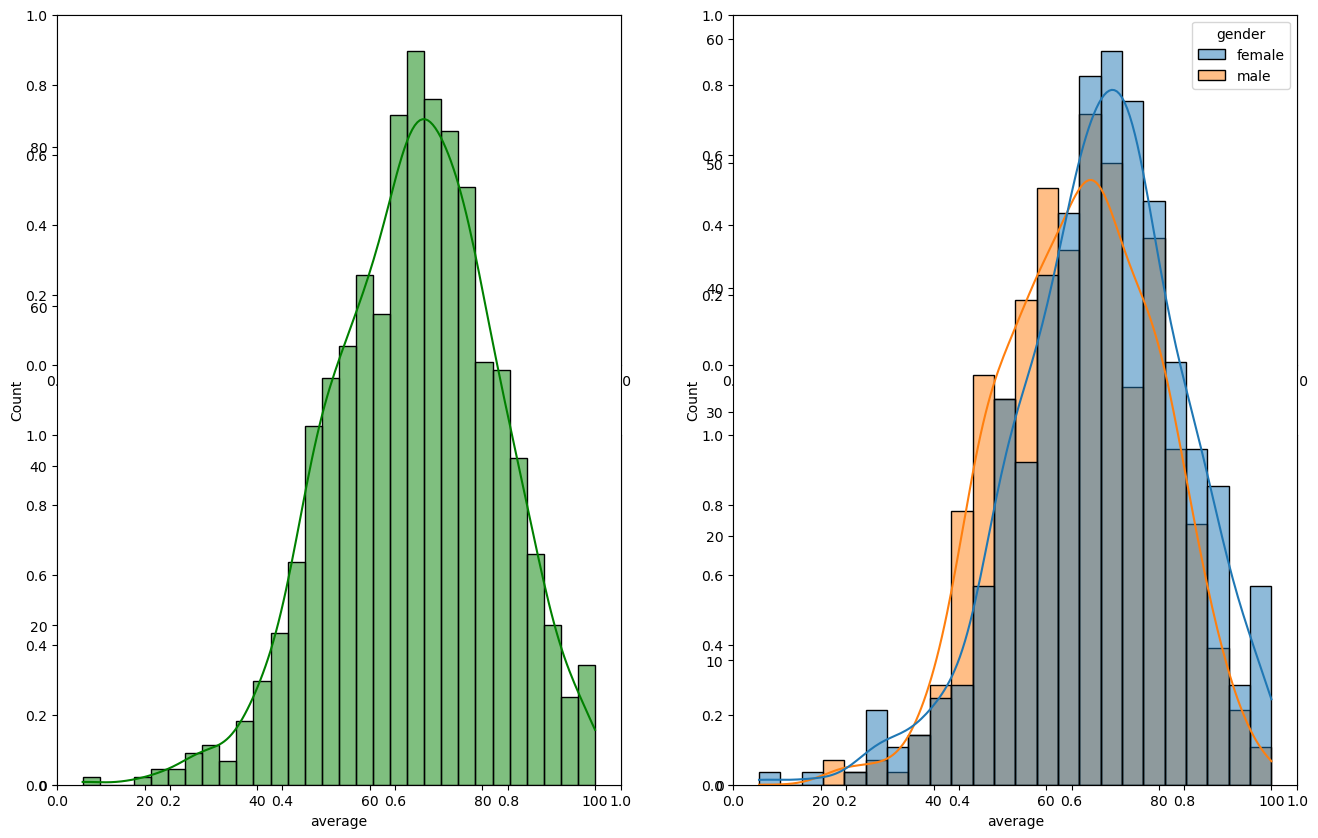

In [38]:
# histrogram & kid 

fig, axs = plt.subplots(2, 2, figsize=(16,10))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30 ,kde=True,color='g')
plt.subplot(122)
sns.histplot(data= df, x='average',kde=True,hue ='gender')
plt.show()

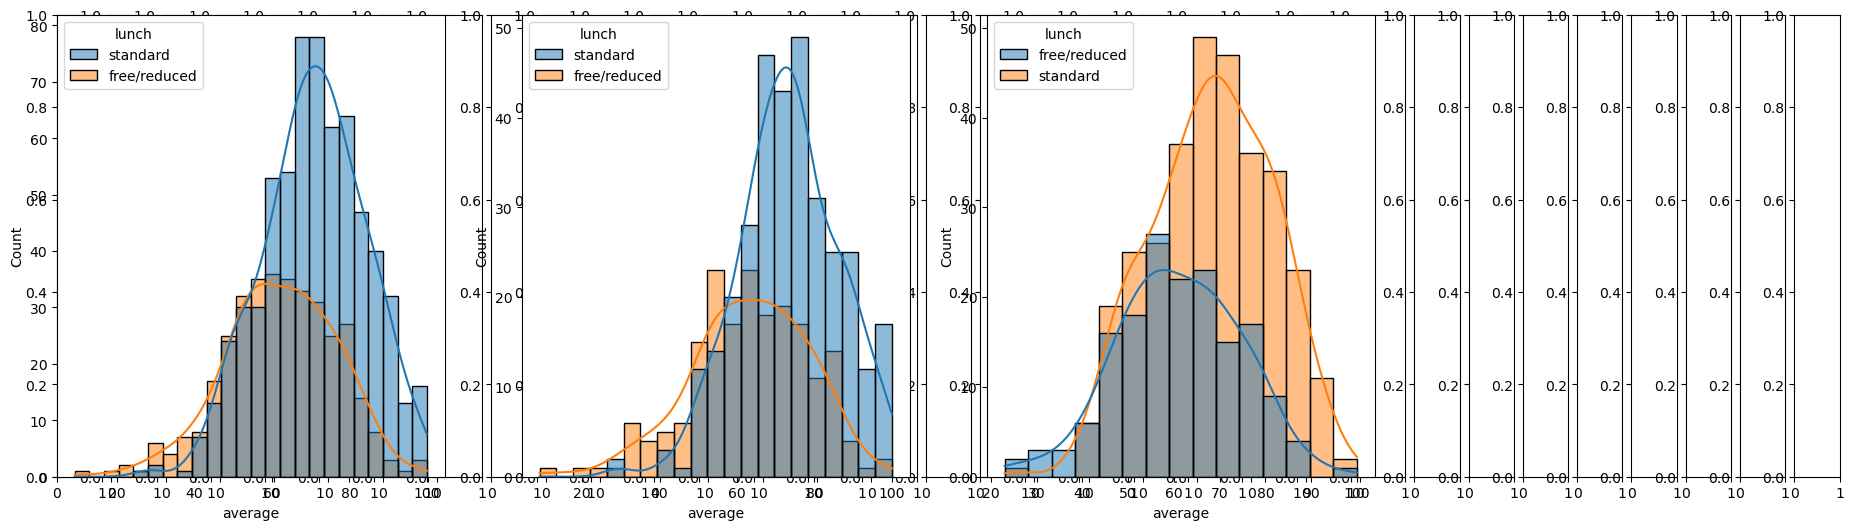

In [41]:
plt.subplots(1, 33, figsize=(23,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue = 'lunch')
plt.subplot(142)
sns.histplot(data= df[df.gender == 'female'], x='average',kde=True,hue ='lunch')
plt.subplot(143)
sns.histplot(data= df[df.gender == 'male'], x='average',kde=True,hue ='lunch')
plt.show()